## 6 - Regional Analysis
## Table of Contents
<ul>
<li><a href="#1">Fracture distribution by latitude</a></li>
<li><a href="#2">Fracture distribution by longitude</a></li>
<li><a href="#3">Fracture distribution by latitude and longitude</a></li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
df_segments = pd.read_csv("./output/df_segments_3.csv")
df_segments.head()

,fracture_id,segment_id,X1,Y1,X2,Y2,delta_X,delta_Y,segment_size,angle_radian,angle_degree,median_brightness
0,1528,1528_2,14880.257,8797.5608,14890.307,8777.9108,10.050,-19.6500,22.070908,2.043562,117.087491,155.0
1,1528,1528_1,14872.006,8806.2608,14880.257,8797.5608,8.251,-8.7000,11.990371,2.329713,133.482698,94.0
2,1527,1527_4,20349.119,3322.3508,20357.025,3323.7462,7.906,1.3954,8.028199,0.174700,10.009551,196.0
3,1527,1527_3,20350.282,3311.8852,20349.119,3322.3508,-1.163,10.4656,10.530021,1.681468,96.341033,182.0
4,1527,1527_2,20338.188,3311.4201,20350.282,3311.8852,12.094,0.4651,12.102940,0.038438,2.202343,212.0


In [3]:
# Reading the Bennu image
image = cv2.imread('Global_20190321_ShapeV20_200kfacets_FB3.png')
image = cv2.flip(image, 0)

img_height, img_length = image.shape[:2]
print (img_height, img_length)

13196 33930


In [4]:
binary_image = np.zeros((img_height, img_length), np.uint8)
binary_image.shape

(13196, 33930)

In [5]:
# Draw segments for the binary image
for index, row in df_segments.iterrows():

    X1, Y1, X2, Y2 = int(row['X1']), int(row['Y1']), int(row['X2']), int(row['Y2'])
    
    start_point = (X1, Y1)
    end_point = (X2, Y2)
    line_color = (255, 255, 255)
    thickness=2

    binary_image=cv2.line(binary_image, start_point, end_point, line_color, thickness)

In [6]:
total_number_of_white_pixels = np.sum(binary_image == 255)
total_number_of_white_pixels

295329

<a id='1'></a>
### Fracture distribution by latitude

Fractures density: % 7.982284164440336
Fractures density: % 28.756065269580706
Fractures density: % 27.273312136634058
Fractures density: % 25.96053892438602
Fractures density: % 10.027799504958876


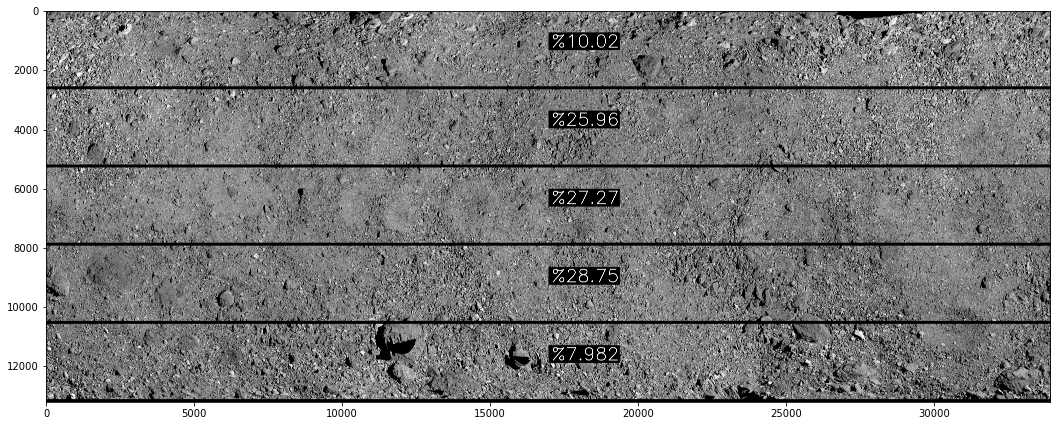

In [7]:
number_of_bins_lat = 5
bin_edges_lat = np.linspace(0, img_height, number_of_bins_lat+1)
bin_edges_lat = bin_edges_lat.astype(int)

labeled_image = np.zeros((0, img_length, 3), np.uint8)

for y in range(number_of_bins_lat):
    cropped_image_binary = binary_image[bin_edges_lat[y]:bin_edges_lat[y+1], :]
    count_of_white_pix = np.sum(cropped_image_binary == 255)
    percentage_white_pix = count_of_white_pix / total_number_of_white_pixels * 100
    print("Fractures density: %", percentage_white_pix)

    cropped_img_org = image[bin_edges_lat[y]:bin_edges_lat[y+1], :, :]

    cropped_img_height, cropped_img_length = cropped_image_binary.shape[:2]
    center_point = (int(cropped_img_length/2), int(cropped_img_height/2))
    label = np.zeros((600, 2400, 3), np.uint8)
    text_color = (255, 255, 255)
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 20
    label = cv2.putText(label, "%"+str(percentage_white_pix), (100, 500), font, fontScale, text_color, 30)
    label = cv2.flip(label, 0)

    x, y = center_point[0], center_point[1]
    h, w = label.shape[:2]
    cropped_img_org[y:y+h, x:x+w] = label

    cropped_img_org = cv2.line(cropped_img_org, (img_length, 0), (0, 0), (0, 0, 0), 200)

    labeled_image = cv2.vconcat([labeled_image, cropped_img_org])

labeled_image = cv2.flip(labeled_image, 0)
plt.figure(figsize=(18, 9))
plt.imshow(labeled_image)


<a id='2'></a>
### Fracture distribution by longitude

In [8]:
# Reading the Bennu image
image = cv2.imread('Global_20190321_ShapeV20_200kfacets_FB3.png')
image = cv2.flip(image, 0)

Fractures density: % 23.148082308205424
Fractures density: % 16.36446132956804
Fractures density: % 24.523836128521072
Fractures density: % 21.22446491878549
Fractures density: % 14.739155314919971


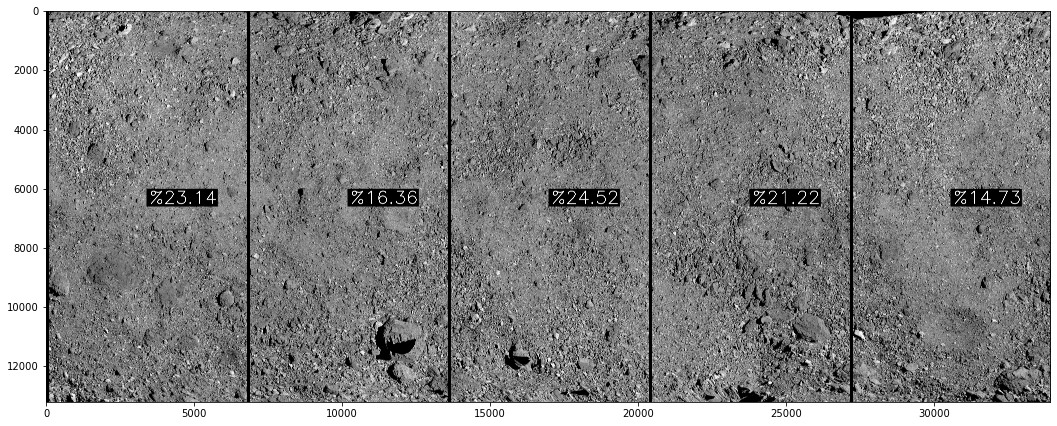

In [9]:
number_of_bins_long = 5
bin_edges_long = np.linspace(0, img_length, number_of_bins_long+1)
bin_edges_long = bin_edges_long.astype(int)

labeled_image = np.zeros((img_height, 0, 3), np.uint8)

for x in range(number_of_bins_long):
    cropped_image_binary = binary_image[:, bin_edges_long[x]:bin_edges_long[x+1]]
    count_of_white_pix = np.sum(cropped_image_binary == 255)
    percentage_white_pix = count_of_white_pix / total_number_of_white_pixels * 100
    print("Fractures density: %", percentage_white_pix)

    cropped_img_org = image[:, bin_edges_long[x]:bin_edges_long[x+1], :]

    cropped_img_height, cropped_img_length = cropped_image_binary.shape[:2]
    center_point = (int(cropped_img_length/2), int(cropped_img_height/2))
    label = np.zeros((600, 2400, 3), np.uint8)
    text_color = (255, 255, 255)
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 20
    label = cv2.putText(label, "%"+str(percentage_white_pix), (100, 500), font, fontScale, text_color, 30)
    label = cv2.flip(label, 0)

    x, y = center_point[0], center_point[1]
    h, w = label.shape[:2]
    cropped_img_org[y:y+h, x:x+w] = label

    cropped_img_org = cv2.line(cropped_img_org, (0, img_height), (0, 0), (0, 0, 0), 200)

    labeled_image = cv2.hconcat([labeled_image, cropped_img_org]) 

labeled_image = cv2.flip(labeled_image, 0)
plt.figure(figsize=(18, 9))
plt.imshow(labeled_image)


<a id='3'></a>
### Fracture distribution by latitude and longitude

In [10]:
# Reading the Bennu image
image = cv2.imread('Global_20190321_ShapeV20_200kfacets_FB3.png')
image = cv2.flip(image, 0)

In [11]:
number_of_bins_lat = 5
bin_edges_lat = np.linspace(0, img_height, number_of_bins_lat+1)
bin_edges_lat = bin_edges_lat.astype(int)

number_of_bins_long = 10
bin_edges_long = np.linspace(0, img_length, number_of_bins_long+1)
bin_edges_long = bin_edges_long.astype(int)

density_matrix = np.zeros((number_of_bins_lat, number_of_bins_long), dtype=np.float64)

for y in range(number_of_bins_lat):
    for x in range(number_of_bins_long):
        cropped_image_binary = binary_image[bin_edges_lat[y]:bin_edges_lat[y+1], bin_edges_long[x]:bin_edges_long[x+1]]
        count_of_white_pix = np.sum(cropped_image_binary == 255)
        percentage_white_pix = count_of_white_pix / total_number_of_white_pixels * 100
        #print("Fractures density: %", percentage_white_pix)

        density_matrix[y,x] = percentage_white_pix
density_matrix = np.flip(density_matrix, 0) # vertical flip

In [12]:
# normalize density matrix [0 - 255]
density_matrix = (255*(density_matrix - np.min(density_matrix))/np.ptp(density_matrix)).astype(int)
density_matrix

array([[ 40,  28,  12,  97,  41,  35,  50,  26,  19,  66],
       [220, 108,  60, 109, 193, 108,  62, 115,  73,  99],
       [158, 108,  82,  77, 170, 115, 255,  81, 104,  58],
       [212, 125,  73, 107, 180, 135, 148, 108,  66, 119],
       [ 18,   0,  58,  31,  51,  53,  20,  64,   9,  18]])

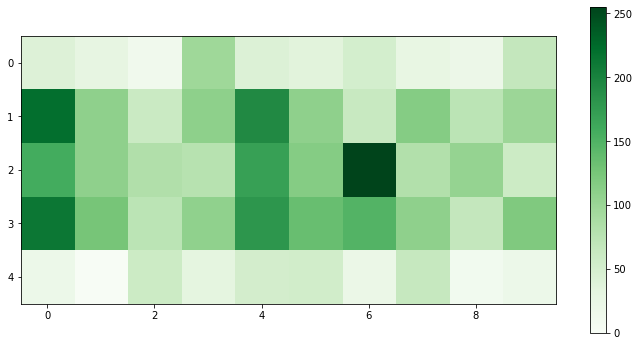

In [13]:
plt.figure(figsize=(12, 6))

plt.imshow(density_matrix, cmap="Greens")
plt.colorbar()
plt.show()

In [14]:
# resize density matrix
density_matrix = density_matrix.astype(np.uint8)
density_matrix = cv2.resize(density_matrix, (img_length, img_height), interpolation = cv2.INTER_AREA)

# convert single channel density matrix to 3 channel
new_channel = np.zeros((img_height, img_length), np.uint8)
density_matrix = cv2.merge([new_channel, density_matrix, new_channel])

# blend asteroid image with density matrix
combined = cv2.addWeighted(image, 0.4, density_matrix, 0.6, 0)

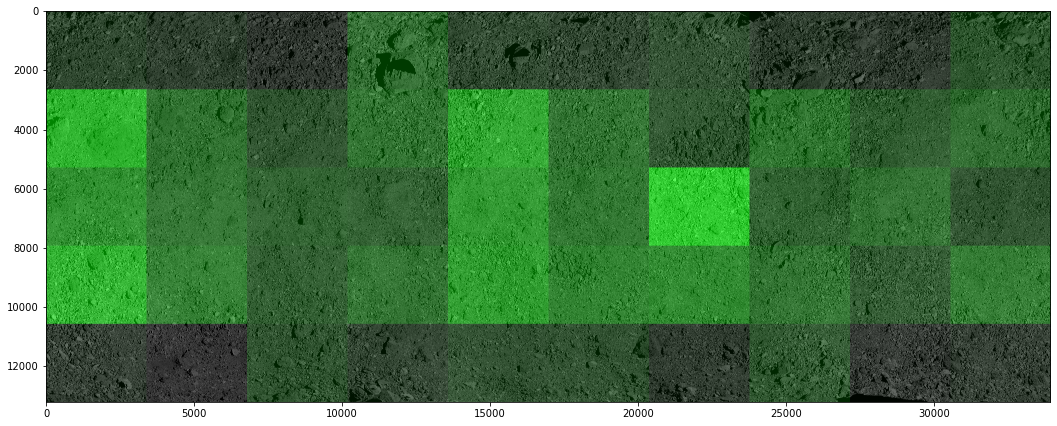

In [15]:
plt.figure(figsize=(18, 9))
plt.imshow(combined)
plt.show()